Inspired by the Amazing Graphs Numberphile videos:

https://www.youtube.com/watch?v=pAMgUB51XZA
https://www.youtube.com/watch?v=o8c4uYnnNnc
https://www.youtube.com/watch?v=j0o-pMIR8uk

In [73]:
import math
import matplotlib.pyplot as plt

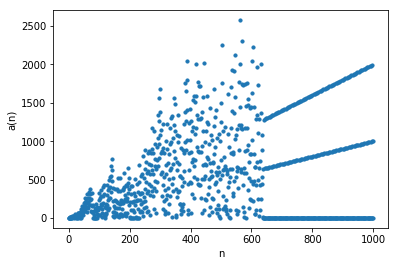

In [3]:
a = [1,1]
n = 2

while (n < 1000):
    n = len(a)
    a_nm1 = a[-1]
    
    if math.gcd(n, a_nm1) == 1:
        a.append(a_nm1 + n + 1)
        n += 1
    else:
        a.append(int(a_nm1 / math.gcd(n, a_nm1)))
        n += 1

plt.scatter(range(len(a)), a, s=10)
plt.xlabel('n')
plt.ylabel('a(n)')
plt.show()

Previously we have looked at using the Sieve of Eratosthenes to find primes. Here we seek something a little faster. From the Stack Overflow wizards:

In [75]:
def primes(n):
    """ Returns  a list of primes < n """
    # https://stackoverflow.com/questions/2068372/fastest-way-to-list-all-primes-below-n/3035188#3035188
    
    sieve = [True] * n
    for i in range(3,int(n**0.5)+1,2):
        if sieve[i]:
            sieve[i*i::2*i]=[False]*((n-i*i-1)//(2*i)+1)
    return [2] + [i for i in range(3,n,2) if sieve[i]]

In [76]:
def subtractionBinary(s1, s2): 
    return bin(int(s1, 2) - int(s2, 2))[2:]

In [86]:
pList = primes(1000000)
values = []

for i in range(len(pList)):    
    p_binary = "{0:b}".format(pList[i])
    reverse = p_binary[::-1]
    string = subtractionBinary(p_binary, reverse)

    if string[0] == 'b':
        values.append(-int(string[1::], 2))

    else:
        values.append(int(string, 2))

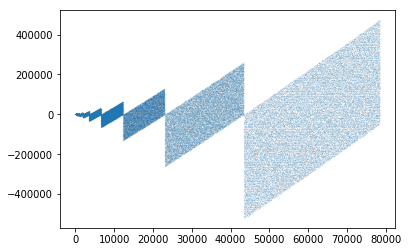

In [91]:
plt.scatter(range(len(values)), values, s=0.001)
plt.show()

In [95]:
def baseb(n, b):
    '''
    Converts a decimal into a number of a specified base.
    
    Input: n - decimal (int)
           b - base (int)
    '''
    
    e = n // b
    q = n % b
    if n == 0:
        return '0'
    elif e == 0:
        return str(q)
    else:
        return baseb(e, b) + str(q)

In [150]:
def balanced_ternary(decimal):
    '''
    Converts a decimal into balanced ternary
    {-1, 0, 1}
    '''
    
    number = baseb(decimal, 3)
    value = 0

    for i in range(len(number)-1, 0-1, -1):
        power = len(number)-i-1

        if number[i] == '2':
            value += -1 * 3**power

        else:
            value += int(number[i]) * 3**power
            
    return value

In [154]:
n = 100
bt_values = []
for i in range(n):
    bt_values.append(balanced_ternary(i))

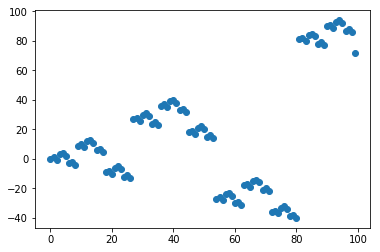

In [157]:
plt.scatter(range(len(bt_values)), bt_values)
plt.show()

In [166]:
def product_function(n):
    '''
    Takes a number and returns the product of 
    its non-zero digits.
    '''
    value = 1
    for i in range(len(str(n))):
        if str(n)[i] != '0':
            value *= int(str(n)[i])

    return value


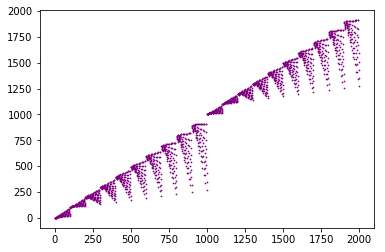

In [174]:
wisteria_value = []
for i in range(2000):
    wisteria_value.append(i - product_function(i))
    
plt.scatter(range(len(wisteria_value)), wisteria_value, s=0.5, c='purple')
plt.show()

In [179]:
def SternSeq(n):
    '''
    Quite an inefficient function, but it does the job
    for illustrative purposes right now.
    '''
    
    if n <= 1:
        return n

    while (n > 2) and (n % 2 == 0):
        n /= 2

    return int(SternSeq((n-1)/2) + SternSeq((n+1) / 2))

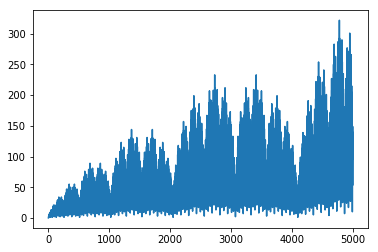

In [181]:
n = 5000
stern_list = []
for i in range(n):
    stern_list.append(fusc(i))
    
plt.plot(range(len(stern_list)), stern_list)
plt.show()

In [ ]:
def Fibonacci(n):
    a,b = 0,1
    for i in range(n):
        a,b = a+b, b
    return a

In [220]:
def HofstaderQ(n):
    sequence = [1,1]

    for i in range(n-2):
        back_term1 = sequence[-1]
        back_term2 = sequence[-2]

        value1 = sequence[-back_term1]
        value2 = sequence[-back_term2]

        sequence.append(value1+value2)
        
    return sequence

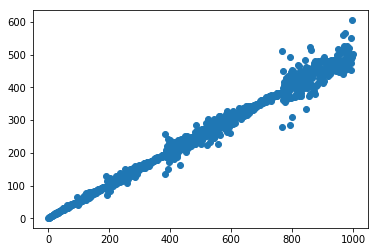

In [222]:
plt.scatter(range(len(HofstaderQ(1000))), HofstaderQ(1000))